# Lending Club Case Study

Group Members
1. Anshuman Tripathi
2. Vivek A V

#### Loading Data

In [6]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

loan_data = pd.read_csv('loan.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
defaulters = loan[loan.loan_status == 'Charged Off']
defaulters.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data cleaning

### Dropping unwanted columns. 
    pymnt_plan,
    initial_list_status,
    collections_12_mths_ex_med,
    mths_since_last_major_derog,
    policy_code,
    application_type,
    annual_inc_joint,
    dti_joint,
    verification_status_joint,
    acc_now_delinq,
    tot_coll_amt,
    tot_cur_bal,
    open_acc_6m,
    open_il_6m,
    open_il_12m,
    open_il_24m,
    mths_since_rcnt_il,
    total_bal_il,
    il_util,
    open_rv_12m,
    open_rv_24m,
    max_bal_bc,
    all_util,
    total_rev_hi_lim,
    inq_fi,
    total_cu_tl,
    inq_last_12m,
    acc_open_past_24mths,
    avg_cur_bal,
    bc_open_to_buy,
    bc_util,
    chargeoff_within_12_mths,
    delinq_amnt,
    mo_sin_old_il_acct,
    mo_sin_old_rev_tl_op,
    mo_sin_rcnt_rev_tl_op,
    mo_sin_rcnt_tl,
    mort_acc,
    mths_since_recent_bc,
    mths_since_recent_bc_dlq,
    mths_since_recent_inq,
    mths_since_recent_revol_delinq,
    num_accts_ever_120_pd,
    num_actv_bc_tl,
    num_actv_rev_tl,
    num_bc_sats,
    num_bc_tl,
    num_il_tl,
    num_op_rev_tl,
    num_rev_accts,
    num_rev_tl_bal_gt_0,
    num_sats,
    num_tl_120dpd_2m,
    num_tl_30dpd,
    num_tl_90g_dpd_24m,
    num_tl_op_past_12m,
    pct_tl_nvr_dlq,
    percent_bc_gt_75,
    tax_liens,
    tot_hi_cred_lim,
    total_bal_ex_mort,
    total_bc_limit,
    total_il_high_credit_limit

In [128]:
# TERM IS A NUMERICAL DATA, HENCE WE WILL CONVERT IT FROM OBJECT TO NUMBER AND REMOVE THE STRING
defaulters.term = defaulters.term.apply(lambda x : int(x[0:3]))

# INTREST RATE IS A NUMERICAL DATA, HENCE WE WILL CONVERT IT FROM OBJECT TO NUMBER AND REMOVE THE STRING
defaulters.int_rate = defaulters.int_rate.apply(lambda x : float(x[:-1]))

# SINCE THESE COLUMNS HAVE EITHER NOT BEEN SET OR IS SAME FOR ALL OF THE CANDIDATES, IT WOULD BE BETTER TO DROP
defaulters = defaulters.drop(columns=[
    'pymnt_plan',
    'initial_list_status',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',
    'application_type',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'acc_now_delinq',
    'tot_coll_amt',
    'tot_cur_bal',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'total_rev_hi_lim',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'acc_open_past_24mths',
    'avg_cur_bal',
    'bc_open_to_buy',
    'bc_util',
    'chargeoff_within_12_mths',
    'delinq_amnt',
    'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl',
    'mort_acc',
    'mths_since_recent_bc',
    'mths_since_recent_bc_dlq',
    'mths_since_recent_inq',
    'mths_since_recent_revol_delinq',
    'num_accts_ever_120_pd',
    'num_actv_bc_tl',
    'num_actv_rev_tl',
    'num_bc_sats',
    'num_bc_tl',
    'num_il_tl',
    'num_op_rev_tl',
    'num_rev_accts',
    'num_rev_tl_bal_gt_0',
    'num_sats',
    'num_tl_120dpd_2m',
    'num_tl_30dpd',
    'num_tl_90g_dpd_24m',
    'num_tl_op_past_12m',
    'pct_tl_nvr_dlq',
    'percent_bc_gt_75',
    'tax_liens',
    'tot_hi_cred_lim',
    'total_bal_ex_mort',
    'total_bc_limit',
    'total_il_high_credit_limit',
])

# INTUITIVELY URL HAS NO IMPACT ON LOAN DEFAULTS, IT WOULD BE BETTER TO DROP THE COLUMN
defaulters = defaulters.drop(columns=['url'])

# SINCE THE ZIPCODE OF THE CANDIDATES PROVIDED IN THE DATASET ARE MASKED, THEY ARE LITTLE TO NO VALUE FOR US
# HENCE IT WILL BE BETTER TO DROP THEM
defaulters = defaulters.drop(columns=['zip_code'])

# SINCE THE NEXT PAYMENT DATE PROVIDED IN THE DATASET ARE SIGNIFICANTLY LOW IN NUMBER,
# HENCE IT WILL BE BETTER TO DROP THEM
defaulters = defaulters.drop(columns=['next_pymnt_d'])

# SINCE RECOVERIES AND COLLECTION RECOVERY FEE ARE POST CHARGE OFF,
# IT DOES NOT MAKE SENSE TO INCLUDE THEM IN OUR DATASET FOR ANALYSIS
defaulters = defaulters.drop(columns=['recoveries', 'collection_recovery_fee'])


16


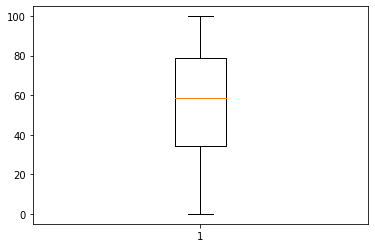

55.57211014079486
58.4


In [129]:
# REVOLVING LINE UTILZATION RATE IS A NUMERIC ENTITY, 
# HENCE WE WILL CONVERT IT FROM OBJECT TO NUMBER AND REMOVE THE STRING

print(defaulters.revol_util.isna().sum())
# WE NEED TO BE CAREFUL AS IT HAS AROUND 16 nan VALUES

defaulters.revol_util.dtype
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

revol_util = []

for x in defaulters.revol_util:
    try:
        revol_util.append(float(x[:-1]))
    except:
        if(math.isnan(x)):
            continue

plt.boxplot(revol_util)
plt.show()
# THE ABOVE TRACED BOX PLOT REVEALS THAT THERE ARE NO MAJOR OUTLIERS AND THE DATA IS EQUALLY DISTRIBUTED

print(np.asarray(revol_util).mean())
print(np.median(revol_util))
# WE SEE THAT THERE IS NOT A MAJOR EXAGGERATION BETWEEN MEAN AND MEDIAN
# HENCE WE MAY USE MEAN OVER MEDIAN TO FILL IN THE MISSING DATA

def populate(y):
    try:
        value = float(y[:-1])
        return value
    except:
        if(math.isnan(y)):
            return np.asarray(revol_util).mean() 

defaulters.revol_util = defaulters.revol_util.apply(lambda x: populate(x))

# Useful variables and there types

### Categorical :
    1. emp_title
    2. emp_length
    3. home_ownership
    4. grade
    5. sub_grade
    6. verification_status
    7. issue_d
    8. desc
    9. purpose
    10. addr_state

### Numerical :
    1. loan_amnt
    2. funded_amnt
    3. funded_amnt_inv
    4. term
    5. int_rate
    6. installment
    7. annual_inc
    8. dti
    9. delinq_2yrs
    10. pub_rec
    11. total_acc
    12. out_prncp
    13. out_prncp_inv
    14. total_pymnt
    15. total_pymnt_inv
    16. total_rec_prncp
    17. total_rec_int
    18. total_rec_late_fee
    19. pub_rec_bankruptcies